In [3]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import asyn_fluidc
import sklearn as sk
import random
from sklearn.metrics import (adjusted_rand_score, normalized_mutual_info_score, 
                             fowlkes_mallows_score, jaccard_score, 
                             adjusted_mutual_info_score, homogeneity_score, 
                             completeness_score, v_measure_score, silhouette_score)
import random

sgs1 ="4932.YMR190C"

In [4]:
def graph_info(G0):
    # contains_SGS1 = None
    # contains_SGS1 = G0[sgs1] is not None
    print("Nodes:", G0.number_of_nodes(), "Edges:", G0.number_of_edges(), "Connected:", nx.connected.is_connected(G0), "Subgrahs:", nx.connected.number_connected_components(G0))#, "Contains SGS1:", contains_SGS1, "SGS1 degree:", G0.degree(sgs1))

In [5]:
def random_sample_subsets(G, N,threshold_val = 500, edge_removal_fraction=0.75):

    # if edge weight is less than thresh remove edge
    for edge in G.edges():
        weight = list(G.get_edge_data(edge[0],edge[1]).values())
        if(weight[0]<= threshold_val):
            G.remove_edge(edge[0],edge[1])
    
    subsets = []
    for _ in range(N):
        # copy of G to make a subset from
        H = G.copy()
        
        # number of edges to remove
        num_edges_to_remove = int(edge_removal_fraction * G.number_of_edges())
        
        # random selection of edges to remove
        edges = list(G.edges())
        edges_to_remove = random.sample(edges, num_edges_to_remove)
        
        # remove edges from H
        H.remove_edges_from(edges_to_remove)

        H = H.subgraph(max(nx.connected_components(H),key=len))
        
        subsets.append(H)
    
    return subsets

def evenly_split_from_tot_subsets(G, N, threshold_val=500):
    # if edge weight is less than thresh remove edge
    for edge in list(G.edges()):
        weight = list(G.get_edge_data(edge[0], edge[1]).values())
        if weight[0] <= threshold_val:
            G.remove_edge(edge[0], edge[1])

    # all edges in G
    all_edges = list(G.edges())

    # random ordering of edges
    random.shuffle(all_edges)

    # split into N subsets
    edge_subsets = [all_edges[i::N] for i in range(N)]

    # make subsets
    subsets = []
    for edges in edge_subsets:
        # add edges to new graph
        H = nx.Graph()
        H.add_edges_from(edges)

        # add all nodes into new graph
        H.add_nodes_from(G.nodes())

        # grab largest subgraph
        H = H.subgraph(max(nx.connected_components(H), key=len))

        subsets.append(H)

    return subsets


def check_node_in_subsets(subsets, important_node="4932.YMR190C"):
    for subset_idx, subset in enumerate(subsets):
        print(f"\nNodes in Subset {subset_idx + 1}:")
        nodes = list(subset.nodes())
        
        # Check if the important node exists and print its degree
        important_node_degree = None
        if important_node in nodes:
            important_node_degree = subset.degree[important_node]
            print(f"  {important_node} is in this subset with degree {important_node_degree}.")
        else:
            print(f"  {important_node} is NOT in this subset.")
        
        # Get the degrees of all nodes in the subset
        degrees = [degree for _, degree in subset.degree()]
        min_degree, max_degree = min(degrees), max(degrees)
        
        # Create the histogram
        hist, bins = np.histogram(degrees, bins=range(min_degree, max_degree + 2))

        # Plot the degree distribution
        plt.figure(figsize=(8, 6))
        for i in range(len(hist)):
            if important_node_degree is not None and bins[i] <= important_node_degree < bins[i + 1]:
                # Highlight the bin containing the important node's degree
                plt.bar(bins[i], hist[i], width=1, color='red', label=f'Degree {important_node_degree} (important node)')
            else:
                # Default color for other bins
                plt.bar(bins[i], hist[i], width=1, color='blue')
        
        # Add labels and title
        plt.title(f'Degree Distribution for Subset {subset_idx + 1}')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Add a legend if the important node was found
        if important_node_degree is not None:
            plt.legend()
        
        # Show the plot
        plt.show()

In [6]:
G0 = nx.read_weighted_edgelist("4932.protein.links.v12.0.txt", comments="#", nodetype=str)
graph_info(G0)

Nodes: 6538 Edges: 1412421 Connected: True Subgrahs: 1



Nodes in Subset 1:
  4932.YMR190C is in this subset with degree 212.


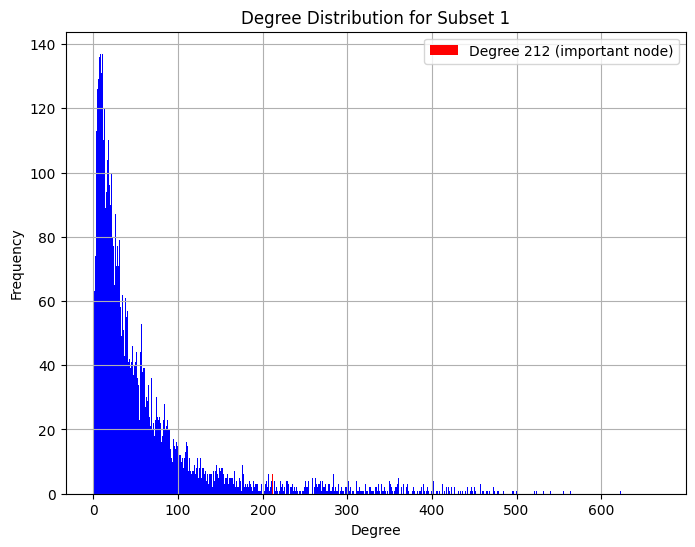

In [7]:
full_set = random_sample_subsets(G0,1,threshold_val=500, edge_removal_fraction=0)
check_node_in_subsets(full_set)

Option 1: randomly grab some fraction of edges and then make N new graphs from that

In [8]:
subsets = random_sample_subsets(G0,20,threshold_val=500, edge_removal_fraction=0.75)

In [9]:
for subset in subsets:
    graph_info(subset)

Nodes: 5851 Edges: 47406 Connected: True Subgrahs: 1
Nodes: 5846 Edges: 47408 Connected: True Subgrahs: 1
Nodes: 5870 Edges: 47411 Connected: True Subgrahs: 1
Nodes: 5871 Edges: 47407 Connected: True Subgrahs: 1
Nodes: 5843 Edges: 47406 Connected: True Subgrahs: 1
Nodes: 5866 Edges: 47405 Connected: True Subgrahs: 1
Nodes: 5835 Edges: 47402 Connected: True Subgrahs: 1
Nodes: 5853 Edges: 47403 Connected: True Subgrahs: 1
Nodes: 5842 Edges: 47403 Connected: True Subgrahs: 1
Nodes: 5866 Edges: 47412 Connected: True Subgrahs: 1
Nodes: 5845 Edges: 47408 Connected: True Subgrahs: 1
Nodes: 5835 Edges: 47406 Connected: True Subgrahs: 1
Nodes: 5823 Edges: 47395 Connected: True Subgrahs: 1
Nodes: 5856 Edges: 47408 Connected: True Subgrahs: 1
Nodes: 5853 Edges: 47413 Connected: True Subgrahs: 1
Nodes: 5855 Edges: 47412 Connected: True Subgrahs: 1
Nodes: 5832 Edges: 47402 Connected: True Subgrahs: 1
Nodes: 5873 Edges: 47399 Connected: True Subgrahs: 1
Nodes: 5843 Edges: 47402 Connected: True Subgr

Option 2: take all the edges split them evenly into N subsets, no duplicates

In [10]:
subsets = evenly_split_from_tot_subsets(G0,4,threshold_val=500)

In [11]:
for subset in subsets:
    graph_info(subset)

Nodes: 5816 Edges: 47406 Connected: True Subgrahs: 1
Nodes: 5848 Edges: 47401 Connected: True Subgrahs: 1
Nodes: 5863 Edges: 47403 Connected: True Subgrahs: 1
Nodes: 5840 Edges: 47401 Connected: True Subgrahs: 1


In [12]:

def stability_check(G, k_values, num_runs=10, max_iter=100, seed=None):
    stability_scores = {}

    for k in k_values:
        print(k)
        community_sets = []
        
        # Run asyn_fluidc multiple times for each k
        for run in range(num_runs):
            print(run)
            communities = list(asyn_fluidc(G, k, max_iter=max_iter, seed=seed))
            # Convert communities into a list of node-community mappings
            community_labels = {node: i for i, comm in enumerate(communities) for node in comm}
            # Append the resulting community structure as labels
            community_sets.append([community_labels[node] for node in G.nodes()])

        ari_scores = []
        nmi_scores = []
        fmi_scores = []
        jaccard_scores = []
        ami_scores = []
        homogeneity_scores = []
        completeness_scores = []
        v_measure_scores = []
        
        for i in range(num_runs):
            for j in range(i + 1, num_runs):
                ari = adjusted_rand_score(community_sets[i], community_sets[j])
                nmi = normalized_mutual_info_score(community_sets[i], community_sets[j])
                fmi = fowlkes_mallows_score(community_sets[i], community_sets[j])
                jaccard = jaccard_score(community_sets[i], community_sets[j], average='macro')
                ami = adjusted_mutual_info_score(community_sets[i], community_sets[j])
                homogeneity = homogeneity_score(community_sets[i], community_sets[j])
                completeness = completeness_score(community_sets[i], community_sets[j])
                v_measure = v_measure_score(community_sets[i], community_sets[j])

                # Append scores for this pair
                ari_scores.append(ari)
                nmi_scores.append(nmi)
                fmi_scores.append(fmi)
                jaccard_scores.append(jaccard)
                ami_scores.append(ami)
                homogeneity_scores.append(homogeneity)
                completeness_scores.append(completeness)
                v_measure_scores.append(v_measure)
        
        # Average scores across all pairs
        stability_scores[k] = {
            'ARI': sum(ari_scores) / len(ari_scores),
            'NMI': sum(nmi_scores) / len(nmi_scores),
            'FMI': sum(fmi_scores) / len(fmi_scores),
            'Jaccard': sum(jaccard_scores) / len(jaccard_scores),
            'AMI': sum(ami_scores) / len(ami_scores),
            'Homogeneity': sum(homogeneity_scores) / len(homogeneity_scores),
            'Completeness': sum(completeness_scores) / len(completeness_scores),
            'V-Measure': sum(v_measure_scores) / len(v_measure_scores)
        }
    
    return stability_scores


k_values = range(5, 100,5)    # Values of k to test
stability = stability_check(full_set[0], k_values)

# Print or plot stability scores for ARI and NMI
for k, scores in stability.items():
    print(f"k = {k}: ARI = {scores['ARI']:.3f}, NMI = {scores['NMI']:.3f}")

5
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
15
0
1
2
3
4
5
6
7
8
9
20
0
1
2
3
4
5
6
7
8
9
25
0
1
2
3
4
5
6
7
8
9
30
0
1
2
3
4
5
6
7
8
9
35
0
1
2
3
4
5
6
7
8
9
40
0
1
2
3
4
5
6
7
8
9
45
0
1
2
3
4
5
6
7
8
9
50
0
1
2
3
4
5
6
7
8
9
55
0
1
2
3
4
5
6
7
8
9
60
0
1
2
3
4
5
6
7
8
9
65
0
1


KeyboardInterrupt: 

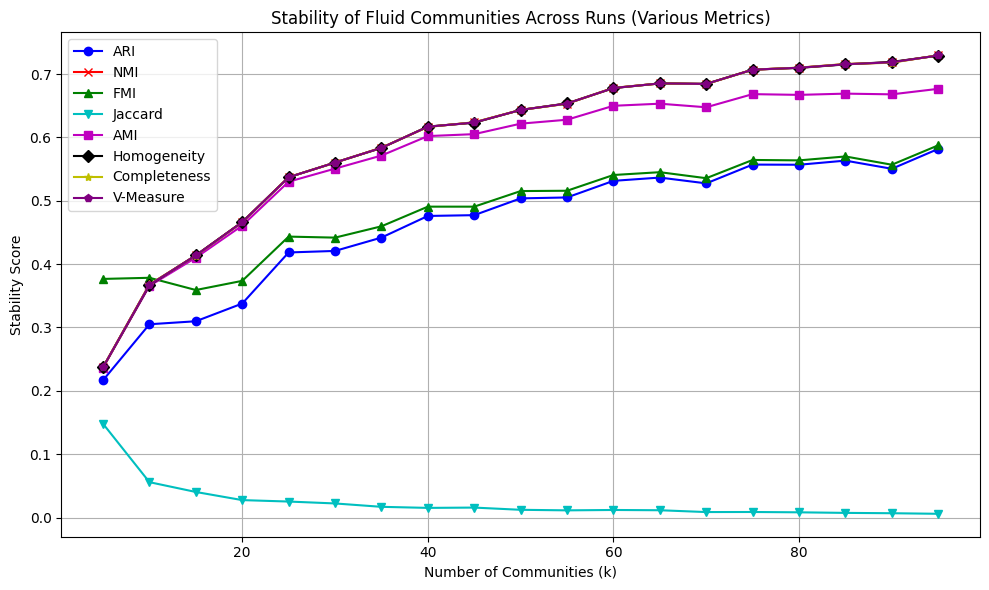

In [31]:
k_values = list(stability.keys())

# Initialize lists for each metric
ari_scores = [stability[k]['ARI'] for k in k_values]
nmi_scores = [stability[k]['NMI'] for k in k_values]
fmi_scores = [stability[k]['FMI'] for k in k_values]
jaccard_scores = [stability[k]['Jaccard'] for k in k_values]
ami_scores = [stability[k]['AMI'] for k in k_values]
homogeneity_scores = [stability[k]['Homogeneity'] for k in k_values]
completeness_scores = [stability[k]['Completeness'] for k in k_values]
v_measure_scores = [stability[k]['V-Measure'] for k in k_values]

# Plotting each metric
plt.figure(figsize=(10, 6))

plt.plot(k_values, ari_scores, 'bo-', label='ARI')
plt.plot(k_values, nmi_scores, 'rx-', label='NMI')
plt.plot(k_values, fmi_scores, 'g^-', label='FMI')
plt.plot(k_values, jaccard_scores, 'cv-', label='Jaccard')
plt.plot(k_values, ami_scores, 'ms-', label='AMI')
plt.plot(k_values, homogeneity_scores, 'kD-', label='Homogeneity')
plt.plot(k_values, completeness_scores, 'y*-', label='Completeness')
plt.plot(k_values, v_measure_scores, 'p-', label='V-Measure', color='purple')

# Add titles and labels
plt.title("Stability of Fluid Communities Across Runs (Various Metrics)")
plt.xlabel("Number of Communities (k)")
plt.ylabel("Stability Score")

# Display legend
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

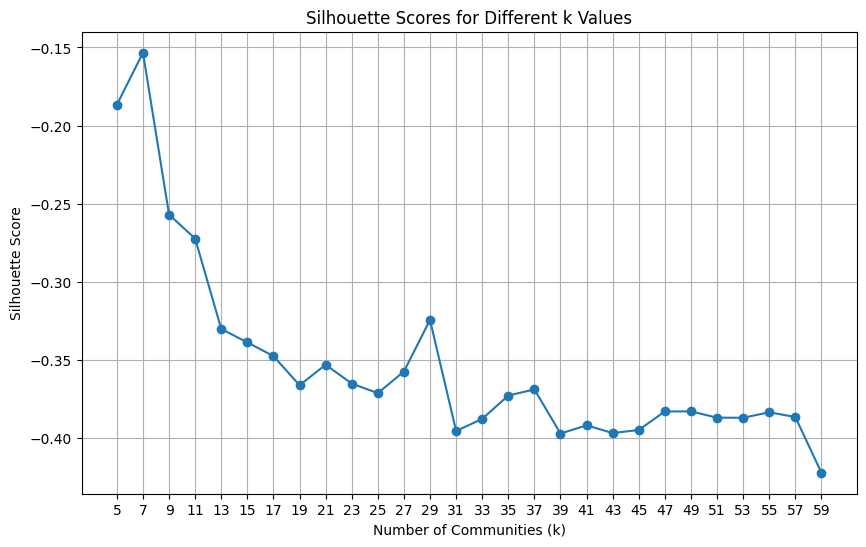

In [17]:
silhouette_scores = []
k_values = range(5, 60,2) 
node_to_index = {node: idx for idx, node in enumerate(full_set[0].nodes())}
# Compute silhouette scores for each k
for k in k_values:
    communities = asyn_fluidc(full_set[0], k)
    
    # Create labels for each node based on their community assignment
    labels = np.zeros(full_set[0].number_of_nodes())
    for community_id, community in enumerate(communities):
        for node in community:
            index = node_to_index[node] 
            labels[index] = community_id

    feature_vectors = np.array([full_set[0].degree(node) for node in full_set[0].nodes()])

    # Reshape feature_vectors to be 2D
    feature_vectors = feature_vectors.reshape(-1, 1)

    # Calculate silhouette score
    score = silhouette_score(feature_vectors, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Communities (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
k = 19
communities = asyn_fluidc(full_set[0], k)

In [14]:
k = 19

for subset in full_set:
        
    communities = asyn_fluidc(subset, k)

    centrality_measures = {}

    for i, community in enumerate(communities):
        subgraph = subset.subgraph(community)  # Subgraph for each community

        # Calculate centralities
        degree_centrality = nx.degree_centrality(subgraph)
        betweenness_centrality = nx.betweenness_centrality(subgraph)
        closeness_centrality = nx.closeness_centrality(subgraph)
        #eigenvector_centrality = nx.eigenvector_centrality(subgraph)
        pagerank_centrality = nx.pagerank(subgraph)
        harmonic_centrality = nx.harmonic_centrality(subgraph)

        # Combine results into a centrality score
        centrality_combined = {
            node: (
                degree_centrality.get(node, 0) +
                betweenness_centrality.get(node, 0) +
                closeness_centrality.get(node, 0) +
                #eigenvector_centrality.get(node, 0) +
                pagerank_centrality.get(node, 0) +
                harmonic_centrality.get(node, 0)
            ) for node in subgraph.nodes()
        }

        # Find the most central node (protein) in the community
        most_central_protein = max(centrality_combined, key=centrality_combined.get)

        centrality_measures[i] = {
            "most_central_protein": most_central_protein,
            "degree_centrality": degree_centrality.get(most_central_protein, 0),
            "betweenness_centrality": betweenness_centrality.get(most_central_protein, 0),
            "closeness_centrality": closeness_centrality.get(most_central_protein, 0),
            #"eigenvector_centrality": eigenvector_centrality.get(most_central_protein, 0),
            "pagerank_centrality": pagerank_centrality.get(most_central_protein, 0),
            "harmonic_centrality": harmonic_centrality.get(most_central_protein, 0),
        }

    # Output the most central protein for each community
    for community_idx, data in centrality_measures.items():
        print(f"Community {community_idx}:")
        print(f"Most Central Protein: {data['most_central_protein']}")
        print(f"Degree Centrality: {data['degree_centrality']}")
        print(f"Betweenness Centrality: {data['betweenness_centrality']}")
        print(f"Closeness Centrality: {data['closeness_centrality']}")
        #print(f"Eigenvector Centrality: {data['eigenvector_centrality']}")
        print(f"PageRank Centrality: {data['pagerank_centrality']}")
        print(f"Harmonic Centrality: {data['harmonic_centrality']}")
        print()

Community 0:
Most Central Protein: 4932.YLR229C
Degree Centrality: 0.2880886426592798
Betweenness Centrality: 0.06039784104910995
Closeness Centrality: 0.49115646258503404
PageRank Centrality: 0.011650672712188436
Harmonic Centrality: 213.50000000000026

Community 1:
Most Central Protein: 4932.YER069W
Degree Centrality: 0.22318840579710145
Betweenness Centrality: 0.05723103763137828
Closeness Centrality: 0.48020692203473336
PageRank Centrality: 0.00934485511967628
Harmonic Centrality: 194.1166666666667

Community 2:
Most Central Protein: 4932.YOR153W
Degree Centrality: 0.12595419847328243
Betweenness Centrality: 0.09415642388175881
Closeness Centrality: 0.3920893585682055
PageRank Centrality: 0.011012663398078012
Harmonic Centrality: 121.54999999999981

Community 3:
Most Central Protein: 4932.YBR196C
Degree Centrality: 0.3958333333333333
Betweenness Centrality: 0.04550313349568506
Closeness Centrality: 0.5704584040747029
PageRank Centrality: 0.01021892040412349
Harmonic Centrality: 226

In [12]:
def centrality_consistency_experiment(subsets, k=5, important_node="4932.YMR190C"):
    # Initialize centrality measures to be calculated
    centrality_scores = {
        "degree": [],
        "betweenness": [],
        "closeness": [],
        "eigenvector": [],
        "pagerank": [],
        "harmonic": [],
        "katz": [],
        "load": [],
        "information": [],
        "current_flow_closeness": [],
        "current_flow_betweenness": []
    }
    
    # Track centrality measures where the important node is found in any community of each subset
    measures_with_important_node = {
        "degree": set(),
        "betweenness": set(),
        "closeness": set(),
        "eigenvector": set(),
        "pagerank": set(),
        "harmonic": set(),
        "katz": set(),
        "load": set(),
        "information": set(),
        "current_flow_closeness": set(),
        "current_flow_betweenness": set()
    }

    # For each subset, find communities and calculate centralities for all nodes
    for subset in subsets:
        communities = list(k_clique_communities(subset, k))

        for i, community in enumerate(communities):
            subgraph = subset.subgraph(community)

            # Calculate various centralities for all nodes in this community
            degree_centrality = nx.degree_centrality(subgraph)
            betweenness_centrality = nx.betweenness_centrality(subgraph)
            closeness_centrality = nx.closeness_centrality(subgraph)
            eigenvector_centrality = nx.eigenvector_centrality(subgraph)
            pagerank_centrality = nx.pagerank(subgraph)
            harmonic_centrality = nx.harmonic_centrality(subgraph)
            katz_centrality = nx.katz_centrality_numpy(subgraph)  # using numpy-based Katz centrality
            load_centrality = nx.load_centrality(subgraph)
            information_centrality = nx.information_centrality(subgraph)
            current_flow_closeness = nx.current_flow_closeness_centrality(subgraph)
            current_flow_betweenness = nx.current_flow_betweenness_centrality(subgraph)

            # Check if important_node is the most central node in this community for any measure
            all_measures = {
                "degree": degree_centrality,
                "betweenness": betweenness_centrality,
                "closeness": closeness_centrality,
                "eigenvector": eigenvector_centrality,
                "pagerank": pagerank_centrality,
                "harmonic": harmonic_centrality,
                "katz": katz_centrality,
                "load": load_centrality,
                "information": information_centrality,
                "current_flow_closeness": current_flow_closeness,
                "current_flow_betweenness": current_flow_betweenness
            }
            
            for measure_name, centrality in all_measures.items():
                if important_node in centrality:
                    if centrality[important_node] == max(centrality.values()):
                        measures_with_important_node[measure_name].add(subset)

        # Collect centrality scores for each node in the community, but only for measures where the important node was found
        for node in subset.nodes():
            if "degree" in measures_with_important_node:
                centrality_scores["degree"].append(degree_centrality.get(node, 0))
            if "betweenness" in measures_with_important_node:
                centrality_scores["betweenness"].append(betweenness_centrality.get(node, 0))
            if "closeness" in measures_with_important_node:
                centrality_scores["closeness"].append(closeness_centrality.get(node, 0))
            if "eigenvector" in measures_with_important_node:
                centrality_scores["eigenvector"].append(eigenvector_centrality.get(node, 0))
            if "pagerank" in measures_with_important_node:
                centrality_scores["pagerank"].append(pagerank_centrality.get(node, 0))
            if "harmonic" in measures_with_important_node:
                centrality_scores["harmonic"].append(harmonic_centrality.get(node, 0))
            if "katz" in measures_with_important_node:
                centrality_scores["katz"].append(katz_centrality.get(node, 0))
            if "load" in measures_with_important_node:
                centrality_scores["load"].append(load_centrality.get(node, 0))
            if "information" in measures_with_important_node:
                centrality_scores["information"].append(information_centrality.get(node, 0))
            if "current_flow_closeness" in measures_with_important_node:
                centrality_scores["current_flow_closeness"].append(current_flow_closeness.get(node, 0))
            if "current_flow_betweenness" in measures_with_important_node:
                centrality_scores["current_flow_betweenness"].append(current_flow_betweenness.get(node, 0))

    # Calculate consistency: standard deviation or variance across subsets for each centrality measure
    consistency = {measure: np.var(scores) for measure, scores in centrality_scores.items() if scores}

    # Output results
    print("Centrality Consistency (Lower variance is better):")
    for measure, variance in consistency.items():
        print(f"{measure.capitalize()} Centrality Variance: {variance:.4f}")

    # Determine the most consistent centrality measure (lowest variance)
    most_consistent = min(consistency, key=consistency.get) if consistency else "None"
    print(f"\nMost Consistent Centrality Measure: {most_consistent.capitalize()}")


In [23]:
def centrality_consistency_experiment(subsets, k=19, important_node="4932.YMR190C"):
    # Initialize centrality scores
    centrality_scores = {
        "degree": [],
        "betweenness": []
    }
    
    # Track where the important node is found
    measures_with_important_node = {
        "degree": set(),
        "betweenness": set()
    }

    # For each subset, find communities and calculate centralities
    for subset_idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {subset_idx + 1}...")
        communities = list(asyn_fluidc(subset, k))

        for community_idx, community in enumerate(communities):
            subgraph = subset.subgraph(community)

            # Check if important_node is in the community
            if important_node in subgraph.nodes():
                print(f"  Community {community_idx}: Contains {important_node}")

                try:
                    # Calculate centralities
                    degree_centrality = nx.degree_centrality(subgraph)
                    betweenness_centrality = nx.betweenness_centrality(subgraph)

                    # Check if important_node is the most central node in this community for any measure
                    all_measures = {
                        "degree": degree_centrality,
                        "betweenness": betweenness_centrality
                    }
                    
                    for measure_name, centrality in all_measures.items():
                        if important_node in centrality:
                            if centrality[important_node] == max(centrality.values()):
                                measures_with_important_node[measure_name].add(subset_idx)
                    
                    # Collect centrality scores for nodes in the subset
                    for node in subset.nodes():
                        if "degree" in measures_with_important_node:
                            centrality_scores["degree"].append(degree_centrality.get(node, 0))
                        if "betweenness" in measures_with_important_node:
                            centrality_scores["betweenness"].append(betweenness_centrality.get(node, 0))

                except Exception as e:
                    print(f"  Error calculating centrality measures: {e}")

    # Calculate consistency: standard deviation across subsets for each centrality measure
    consistency = {measure: np.var(scores) for measure, scores in centrality_scores.items() if scores}

    # Output results
    print("Centrality Consistency (Lower variance is better):")
    for measure, variance in consistency.items():
        print(f"{measure.capitalize()} Centrality Variance: {variance:.4f}")

    # Determine the most consistent centrality measure (lowest variance)
    most_consistent = min(consistency, key=consistency.get) if consistency else "None"
    print(f"\nMost Consistent Centrality Measure: {most_consistent.capitalize()}")

    # Print measures where the important node was found
    print("\nCentrality Measures with Important Node Found in Any Community:")
    for measure, subsets in measures_with_important_node.items():
        if subsets:
            print(f"{measure.capitalize()}: Found in {len(subsets)} subsets")

def check_node_in_subsets(subsets, important_node="4932.YMR190C"):
    for subset_idx, subset in enumerate(subsets):
        print(f"\nNodes in Subset {subset_idx + 1}:")
        nodes = list(subset.nodes())
        
        # Check if the important node exists and print its degree
        important_node_degree = None
        if important_node in nodes:
            important_node_degree = subset.degree[important_node]
            print(f"  {important_node} is in this subset with degree {important_node_degree}.")
        else:
            print(f"  {important_node} is NOT in this subset.")
        
        # Get the degrees of all nodes in the subset
        degrees = [degree for _, degree in subset.degree()]
        min_degree, max_degree = min(degrees), max(degrees)
        
        # Create the histogram
        hist, bins = np.histogram(degrees, bins=range(min_degree, max_degree + 2))

        # Plot the degree distribution
        plt.figure(figsize=(8, 6))
        for i in range(len(hist)):
            if important_node_degree is not None and bins[i] <= important_node_degree < bins[i + 1]:
                # Highlight the bin containing the important node's degree
                plt.bar(bins[i], hist[i], width=1, color='red', label=f'Degree {important_node_degree} (important node)')
            else:
                # Default color for other bins
                plt.bar(bins[i], hist[i], width=1, color='blue')
        
        # Add labels and title
        plt.title(f'Degree Distribution for Subset {subset_idx + 1}')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Add a legend if the important node was found
        if important_node_degree is not None:
            plt.legend()
        
        # Show the plot
        plt.show()

def print_communities(subsets, k=19):
    for subset_idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {subset_idx + 1}...")
        communities = list(asyn_fluidc(subset, k))
        print(f"  Number of communities: {len(communities)}")
        for community_idx, community in enumerate(communities):
            print(f"  Community {community_idx}: {community}")
def check_proteins_in_same_community(subsets, protein_list, k=19):
    for subset_idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {subset_idx + 1}...")
        communities = list(asyn_fluidc(subset, k))
        
        for community_idx, community in enumerate(communities):
            subgraph = subset.subgraph(community)
            if all(protein in subgraph.nodes() for protein in protein_list):
                print(f"  Community {community_idx}: Contains all proteins in the list")
                break
        else:
            print(f"  No community contains all proteins in the list in Subset {subset_idx + 1}")




Nodes in Subset 1:
  4932.YMR190C is in this subset with degree 212.


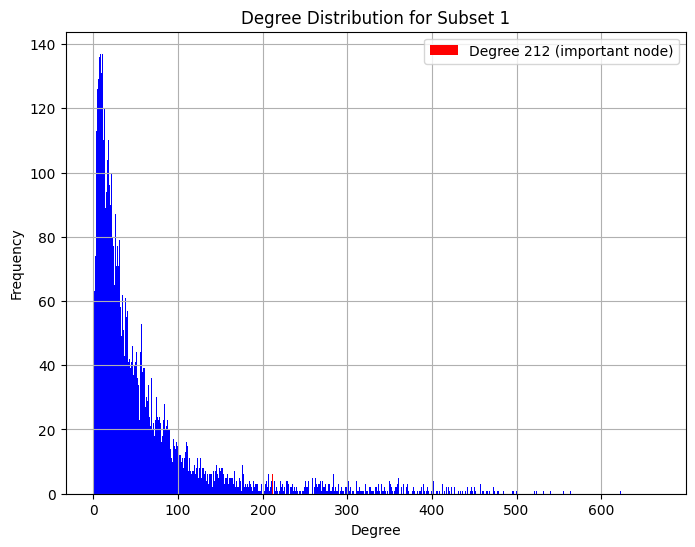


Processing Subset 1...
  Community 9: Contains all proteins in the list


In [24]:
protein_list = ["4932.YLR234W", "4932.YMR190C", "4932.YNL088W", "4932.YPL024W", "4932.YMR167W"]
check_node_in_subsets(full_set)
check_proteins_in_same_community(full_set, protein_list)

In [28]:
communities = list(asyn_fluidc(full_set[0], 19))

In [29]:
# Map nodes to their communities
node_to_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_to_community[node] = i

# Create a new graph to represent the community structure
community_graph = nx.Graph()

# Add nodes for each community
for i, community in enumerate(communities):
    community_graph.add_node(i, members=list(community))

# Calculate the average community size
average_community_size = sum(len(community) for community in communities) / len(communities)

# Add edges between communities based on direct connections
for edge in full_set[0].edges():
    node_u, node_v = edge
    comm_u = node_to_community.get(node_u)
    comm_v = node_to_community.get(node_v)
    if comm_u is not None and comm_v is not None and comm_u != comm_v:
        if not community_graph.has_edge(comm_u, comm_v):
            # Set initial weight based on number of shared connections
            community_graph.add_edge(comm_u, comm_v, weight=1 / average_community_size)
        else:
            # Update weight based on additional connections
            community_graph[comm_u][comm_v]['weight'] += 1 / average_community_size

In [39]:
import networkx as nx
from networkx.algorithms.community import asyn_fluidc
from sklearn.metrics import normalized_mutual_info_score

def get_largest_connected_component(graph):
    if not nx.is_connected(graph):
        largest_cc = max(nx.connected_components(graph), key=len)
        return graph.subgraph(largest_cc).copy()
    return graph

def remove_protein(graph, protein):
    modified_graph = graph.copy()
    if modified_graph.has_node(protein):
        modified_graph.remove_node(protein)
    return modified_graph

def get_communities(graph, k):
    connected_graph = get_largest_connected_component(graph)
    communities = list(asyn_fluidc(connected_graph, k))
    return communities

def community_to_labels(communities, graph):
    node_to_index = {node: i for i, node in enumerate(graph.nodes())}
    labels = [-1] * graph.number_of_nodes()
    
    for i, community in enumerate(communities):
        for node in community:
            labels[node_to_index[node]] = i
    return labels

def calculate_similarity(communities1, communities2, graph):
    labels1 = community_to_labels(communities1, graph)
    labels2 = community_to_labels(communities2, graph)
    return normalized_mutual_info_score(labels1, labels2)

def get_important_nodes(graph, communities):
    important_nodes = []
    for community_num, community in enumerate(communities):
        subgraph = graph.subgraph(community)
        centrality = nx.betweenness_centrality(subgraph)
        most_important_node = max(centrality, key=centrality.get)
        important_nodes.append((most_important_node, community_num))
    return important_nodes

def find_protein_community(protein_node, communities):
    for i, community in enumerate(communities):
        if protein_node in community:
            return i
    return None

original_graph = full_set[0]
connected_graph = get_largest_connected_component(original_graph)
communities = get_communities(connected_graph, 19)

protein_node = sgs1
graph_without_protein = remove_protein(connected_graph, protein_node)
communities_without_protein = get_communities(graph_without_protein, 19)

protein_community = find_protein_community(protein_node, communities)

if protein_community is not None:
    print(f"'SGS1' is in community: {protein_community}")
else:
    print(f"'SGS1' is not found in any community.")

important_nodes = get_important_nodes(connected_graph, communities)

similarities = []

for protein, community_num in important_nodes:
    graph_without_protein = remove_protein(connected_graph, protein)

    communities_after_removal = get_communities(graph_without_protein, 19)
    
    similarity_score = calculate_similarity(communities_without_protein, communities_after_removal, connected_graph)

    similarities.append((protein, community_num, similarity_score))

similarities.sort(key=lambda x: x[2], reverse=True)

print("Similarity scores (higher means more similar to sgs1 removal):")
for protein, community_num, score in similarities:
    print(f"Protein: {protein}, Community: {community_num}, Similarity Score: {score}")


'SGS1' is in community: 12
Similarity scores (higher means more similar to 'your_protein_node' removal):
Protein: 4932.YEL017W, Community: 14, Similarity Score: 0.48215259760115486
Protein: 4932.YMR186W, Community: 9, Similarity Score: 0.474710846266171
Protein: 4932.YIL160C, Community: 10, Similarity Score: 0.46969297696732154
Protein: 4932.YGL026C, Community: 6, Similarity Score: 0.4640705792113655
Protein: 4932.YEL039C, Community: 8, Similarity Score: 0.4593321169450925
Protein: 4932.YFL039C, Community: 4, Similarity Score: 0.4591588192676488
Protein: 4932.YHR030C, Community: 13, Similarity Score: 0.4570866125632437
Protein: 4932.YBR010W, Community: 12, Similarity Score: 0.44688184803009906
Protein: 4932.YLR208W, Community: 5, Similarity Score: 0.44665466625408995
Protein: 4932.YDR068W, Community: 2, Similarity Score: 0.4463743658702024
Protein: 4932.YKL212W, Community: 15, Similarity Score: 0.4455008646536999
Protein: 4932.YGL120C, Community: 0, Similarity Score: 0.4430886356734611


Nodes in Subset 1:
  4932.YMR190C is in this subset with degree 43.


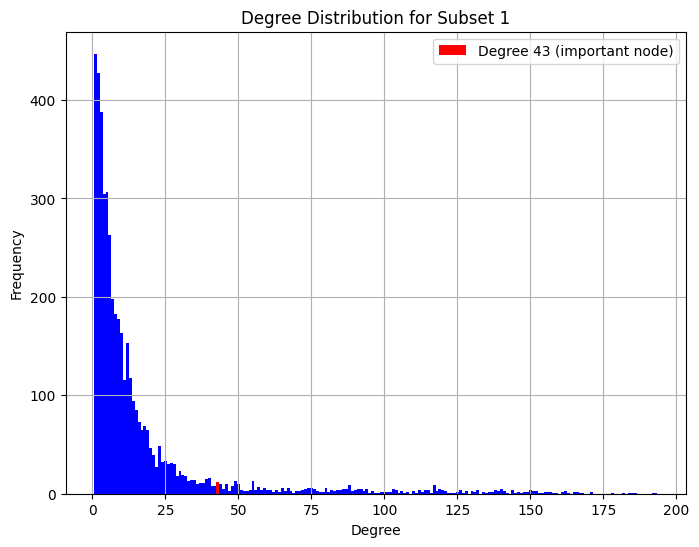


Nodes in Subset 2:
  4932.YMR190C is in this subset with degree 63.


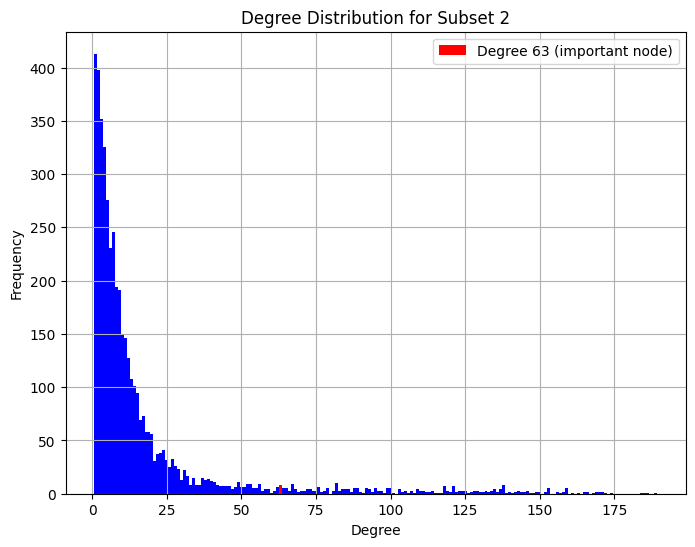


Processing Subset 1...

Processing Subset 2...
Centrality Consistency (Lower variance is better):

Most Consistent Centrality Measure: None

Centrality Measures with Important Node Found in Any Community:


In [45]:
subsets = evenly_split_from_tot_subsets(G0,2,threshold_val=800)


check_node_in_subsets(subsets)
centrality_consistency_experiment(subsets, k=10)

In [50]:
def list_central_nodes(subsets, k=5, important_node="4932.YMR190C"):
    central_nodes_by_community = {}
    count_important_node = 0  # Initialize the count of important_node appearances

    # For each subset, find communities and determine central nodes based on betweenness centrality
    for idx, subset in enumerate(subsets):
        print(f"\nProcessing Subset {idx + 1}...")
        communities = list(k_clique_communities(subset, k))
        central_nodes_by_community[idx] = {}

        for i, community in enumerate(communities):
            subgraph = subset.subgraph(community)

            # Check if important_node is present in the community
            if important_node in subgraph.nodes():
                print(f"  Community {i}: Contains {important_node}")
            else:
                print(f"  Community {i}: Does not contain {important_node}")

            # Calculate betweenness centrality for all nodes in this community
            betweenness_centrality = nx.betweenness_centrality(subgraph)
            
            # Determine the node(s) with the highest betweenness centrality
            if betweenness_centrality:
                most_central_node = max(betweenness_centrality, key=betweenness_centrality.get)
                central_nodes_by_community[idx][i] = most_central_node

                # Print the most central node information
                if important_node in subgraph.nodes():
                    print(f"  Community {i}: Most Central Node (Betweenness Centrality) = {most_central_node}, Contains {important_node}")
                else:
                    print(f"  Community {i}: Most Central Node (Betweenness Centrality) = {most_central_node}")

                # Increment the count if the important_node is the most central node
                if most_central_node == important_node:
                    count_important_node += 1

    return central_nodes_by_community, count_important_node

# Example usage
subsets = evenly_split_from_tot_subsets(G0, 4, threshold_val=500)
central_nodes, count_important_node = list_central_nodes(subsets, k=6, important_node="4932.YMR190C")

# Print results
for subset_idx, communities in central_nodes.items():
    print(f"\nSubset {subset_idx + 1}:")
    for community_idx, node in communities.items():
        print(f"  Community {community_idx}: Most Central Node (Betweenness Centrality) = {node}")

print(f"\n'{sgs1}' appeared as the most central node {count_important_node} times across all communities.")

for subset in subsets:
    contains_SGS1 = None
    contains_SGS1 = subset[sgs1] is not None
    print(contains_SGS1)


Processing Subset 1...
  Community 0: Does not contain 4932.YMR190C
  Community 0: Most Central Node (Betweenness Centrality) = 4932.YPR043W
  Community 1: Does not contain 4932.YMR190C
  Community 1: Most Central Node (Betweenness Centrality) = 4932.YDR337W
  Community 2: Does not contain 4932.YMR190C
  Community 2: Most Central Node (Betweenness Centrality) = 4932.YML026C
  Community 3: Does not contain 4932.YMR190C
  Community 3: Most Central Node (Betweenness Centrality) = 4932.YOL121C
  Community 4: Does not contain 4932.YMR190C
  Community 4: Most Central Node (Betweenness Centrality) = 4932.YNL302C
  Community 5: Does not contain 4932.YMR190C
  Community 5: Most Central Node (Betweenness Centrality) = 4932.YPR043W
  Community 6: Does not contain 4932.YMR190C
  Community 6: Most Central Node (Betweenness Centrality) = 4932.YIL018W
  Community 7: Does not contain 4932.YMR190C
  Community 7: Most Central Node (Betweenness Centrality) = 4932.YNL302C
  Community 8: Does not contain 